# Machine Learning Engineer Nanodegree
## Capstone Project
### Supervised learning algorithm to classify aircraft turnarounds into different categories of towing behavior.

In order to successfully develop a stand allocation model, that can support many management decisions, it is crucial to also develop a preprocessing step, which is the break of the aircraft turnaround with towings.
Rule of thumb rules usually provided by the allocation personnel are not accurate. That is why a supervised learning classification model might be useful.<br><br>
In this project, **a supervised learning algorithm will be developed, in order to predict which kind of towing behavior a turnaround will present, based on its features**. A training data set, labeled data from live operations and containing a set of turnaround features will be used to train three different learning algorithms: DecisionTreeClassifier, SVC and AdaBoostClassifier. **The model with the best performance, in terms of F1 score, will be chosen and further tuned**.


## Data Exploration

In [176]:
# Importing the main libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [313]:
# Reading the turnaround data
label_dict = {'1': 'No towings', '2': 'Single tow', '3': 'Multiple tows'}
data = pd.read_csv("turnaround_data.csv", sep=';', converters={'tow_type': lambda x: label_dict[x]})

In [314]:
data.head()

,acft_type,acft_cat,in_block_hour,off_block_hour,total_time,turnaround_type,turnaround_qualifier,tow_type
0,AT72,C,21,21,33,DD,JJ,No towings
1,A320,C,0,6,376,DD,JJ,Single tow
2,A320,C,0,7,435,II,JJ,No towings
3,B734,C,0,4,234,DD,AA,No towings
4,B738,C,0,6,396,ID,JJ,Single tow


In [315]:
# Checking the data types
data.dtypes

acft_type               object
acft_cat                object
in_block_hour            int64
off_block_hour           int64
total_time               int64
turnaround_type         object
turnaround_qualifier    object
tow_type                object
dtype: object

In [317]:
# Segregating numeric and non numeric columns
numeric = list(data.dtypes[data.dtypes <> object].index)
non_numeric = list(data.dtypes[data.dtypes == object].index)

In [318]:
data[numeric].describe()

,in_block_hour,off_block_hour,total_time
count,10677.000000,10677.000000,10677.000000
mean,12.981830,13.480191,191.911773
std,6.216499,6.062116,239.438139
min,0.000000,0.000000,1.000000
25%,8.000000,9.000000,58.000000
50%,13.000000,14.000000,95.000000
75%,18.000000,19.000000,208.000000
max,23.000000,23.000000,5244.000000


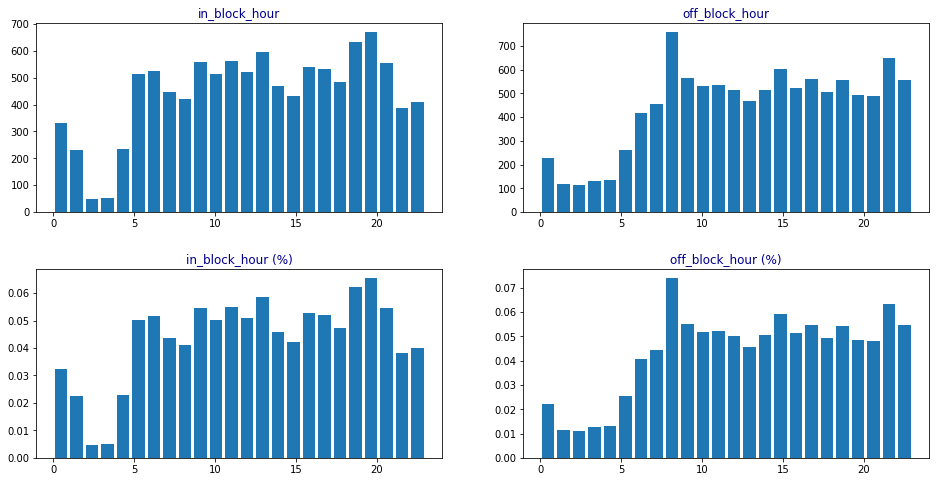

In [319]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.3)
n = 0
for feature in ['in_block_hour', 'off_block_hour']:
    axes[0, n].hist(data[feature], bins=24, rwidth=0.8)
    axes[0, n].set_title(feature, color='darkblue')
    axes[1, n].hist(data[feature], bins=24, density=True, rwidth=0.8)
    axes[1, n].set_title(feature +' (%)', color='darkblue')
    n += 1

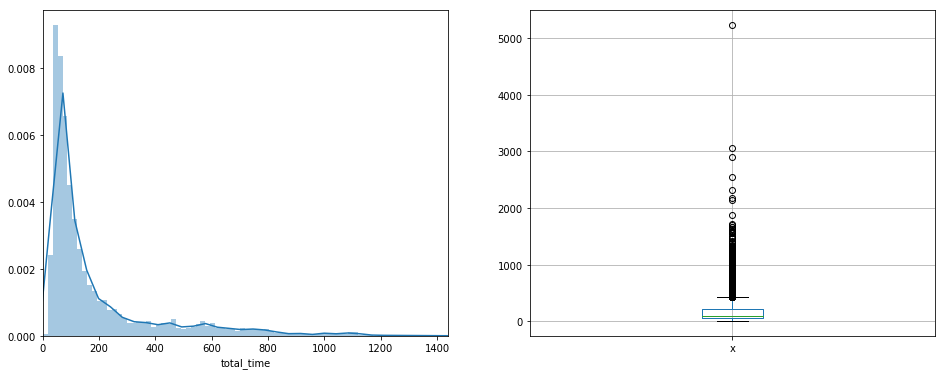

In [320]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
sb.distplot(data['total_time'], ax=axes[0, 0], bins=300)
axes[0, 0].set_xlim([0, 1440])
pd.plotting.boxplot(data['total_time'], figsize=(4, 6), ax=axes[0, 1])

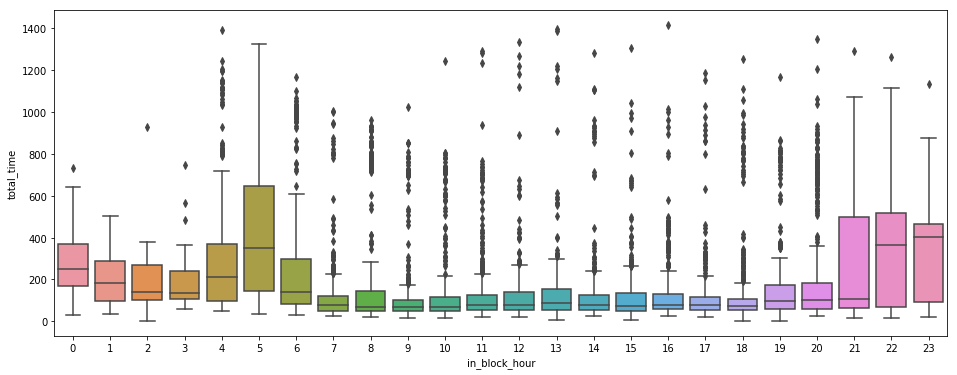

In [321]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6), squeeze=False)
sb.boxplot(x=data['in_block_hour'], y=data['total_time'][data['total_time'] < 1440], ax=axes[0, 0])

In [322]:
data[non_numeric].describe()

,acft_type,acft_cat,turnaround_type,turnaround_qualifier,tow_type
count,10677,10677,10677,10677,10677
unique,28,4,4,26,3
top,B738,C,DD,JJ,No towings
freq,2607,9119,7727,9756,9137


Histogram of aircraft categories, turnaround types and towing types:


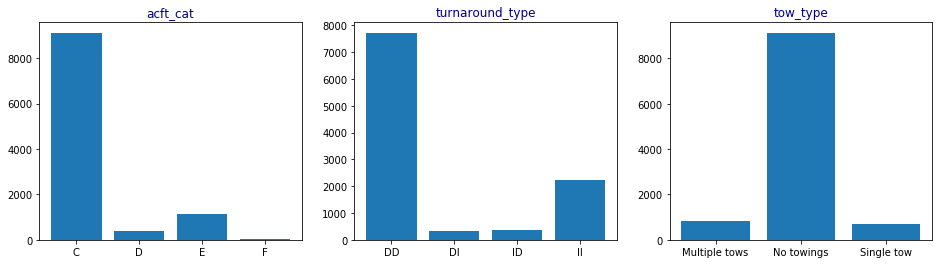

In [330]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4), squeeze=False)
n = 0
for feature in ['acft_cat', 'turnaround_type', 'tow_type']:
    axes[0, n].bar(data[feature].value_counts().index, data[feature].value_counts())
    axes[0, n].set_title(feature, color='darkblue')
    n += 1
print 'Histogram of aircraft categories, turnaround types and towing types:'

Histogram of aircraft types:


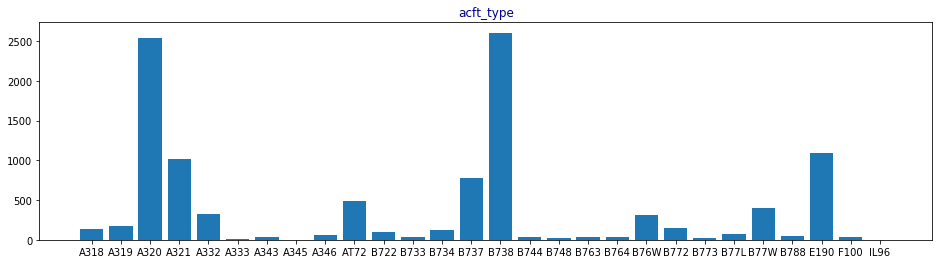

In [324]:
fig, axes = plt.subplots(1, 1, figsize=(16, 4), squeeze=False)
axes[0, 0].bar(data['acft_type'].value_counts().index, data['acft_type'].value_counts())
axes[0, 0].set_title('acft_type', color='darkblue')
print 'Histogram of aircraft types:'

Histogram of turnaround qualifiers:


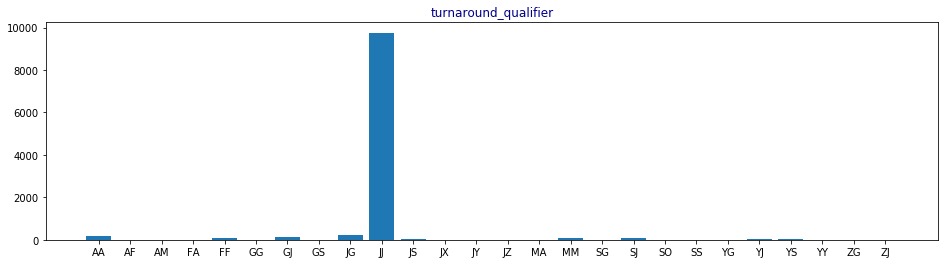

In [325]:
fig, axes = plt.subplots(1, 1, figsize=(16, 4), squeeze=False)
axes[0, 0].bar(data['turnaround_qualifier'].value_counts().index, data['turnaround_qualifier'].value_counts())
axes[0, 0].set_title('turnaround_qualifier', color='darkblue')
print 'Histogram of turnaround qualifiers:'

## Data Preprocessing

### Outliers

In [331]:
len(data)

10677

In [332]:
data = data[data['total_time'] < 1440]
len(data)

10651

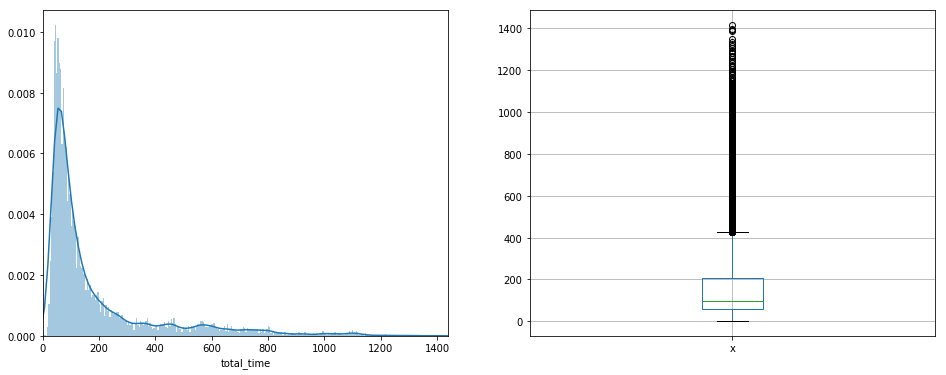

In [333]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
sb.distplot(data['total_time'], ax=axes[0, 0], bins=300)
axes[0, 0].set_xlim([0, 1440])
pd.plotting.boxplot(data['total_time'], figsize=(4, 6), ax=axes[0, 1])

### Dummy Variables

In [ ]:
s

## Training and Evaluating Models

## Model Tuning